# 街風景に「明朝体」を書き入れて「何かが起きた」世界系風景を撮影しよう('24.06.08)

## 明朝体を書き入れるだけで「何かが起きる」風景になる？

[写真に明朝体字幕を入れるだけで「何か起きそう」になるというtweet](https://x.com/kyodai_meltdown/status/1799279447436333163)を読んだ。
市川崑が監督をした、角川映画での横溝正史原作の映画時代から、画面に明朝体文字が出現すると、その映像世界には「何かが起きる」のが掟である。

今日は、世界の何処の風景でも、明朝体文字を書き入れれば「何かが起きる」「何かが現在進行形で起きている」風景になることを眺めてみようと思う。

## 眺めた場所や状況に応じた文章をChatGPTに生成させる。

まずは、眺めた景色に書き入れる「文字列」をChatGPTに生成させてみる。
たとえば、バンコクで撮影した画像に対して、「庵野監督風に、この世界に何かが起きている時に、場所や状況に応じた文章を生成してください」を依頼すると、こんな文章が生成された。
具体的には、ChatGPTいわく「以下は、バンコクの景色を背景にした庵野監督風の発生時刻と対応作業のリストです」ということである。

`````{admonition} ChatGPTが生成した「バンコク風景に似合う、明朝体文字文言」
非常事態発生

午前０８時１５分：未確認生命体出現、初期観測と緊急通達
午前０９時００分：緊急事態宣言、市民避難指示開始
午前１０時３０分：対策本部設置、作戦会議と戦略立案
午後１３時００分：作戦名「タイフーン」発動、迎撃準備完了
午後１６時００分：第一次迎撃作戦開始、前線部隊展開と指揮
`````

In [24]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt

def put_text(img, text, anchor, direction,anc_pos, size, color):
    font = ImageFont.truetype(
        "data/day_240601_ipamp.ttf", size)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    draw.text(anchor,
              text,
              fill=color,
              font=font,
              direction=direction,
              anchor=anc_pos
             )
    return np.array(img)

def put_multilinetext(img, text, anchor, direction, size, color):
    font = ImageFont.truetype(
        "data/day_240601_ipamp.ttf", size)
    img = Image.fromarray(img)
    draw = ImageDraw.Draw(img)
    draw.multiline_text(anchor, text,
            fill=color,
            font=font,
            direction=direction)
    return np.array(img)

試しに、スマホで撮影した風景に「ChatGPTが生成した文字列を、明朝体で書き入れてみる」とこうなる。

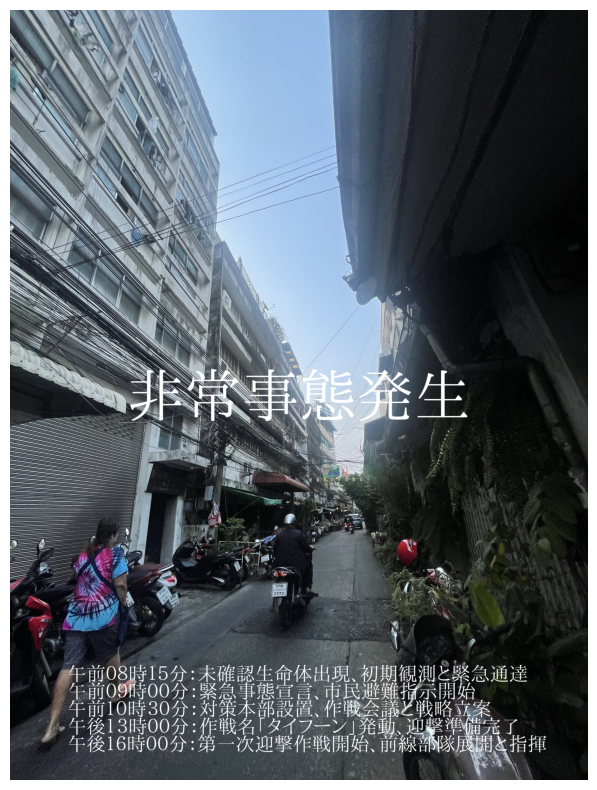

In [62]:
# 画像を読み込む
img= cv2.cvtColor(cv2.imread("data/day_240608_pil_bangkok.png")
                  ,cv2.COLOR_BGR2RGB)

hon_mesage='非常事態発生'
# コピー文を描画
img = put_text(img, hon_mesage, 
    (img.shape[1]/2, img.shape[0]/2), 'rtl','mm', # 'rtl' 'mm' lt'
    300,       # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色    
        
mesage='''
午前０８時１５分：未確認生命体出現、初期観測と緊急通達
午前０９時００分：緊急事態宣言、市民避難指示開始
午前１０時３０分：対策本部設置、作戦会議と戦略立案
午後１３時００分：作戦名「タイフーン」発動、迎撃準備完了
午後１６時００分：第一次迎撃作戦開始、前線部隊展開と指揮
'''
img = put_multilinetext(img, mesage, 
    (300, img.shape[0]-700), 'rtl', # 'rtl' 'mm' lt'
    100,        # ttfから読み出すフォントサイズ
    (255, 255, 255))  # 文字色  

fig=plt.figure(figsize=[10,10])
plt.imshow(img)
plt.axis('off')
plt.show()

%<img style="float:center;transform: rotate(0deg); height:16cm" src="./images/day_240608_bangkok.png" />
```{figure} ./images/day_240608_bangkok.png
---
height: 16cm
---
バンコクの景色に書き入れた明朝体文字
```

## スマホに写る風景は「自分が守る世界の景色」

未確認生命体が出現して初期観測をするや否や「緊急通達を実施する」とか、緊急事態宣言を発布すると同時に「市民避難指示開始」するとか、あるいは、対策本部を設置して作戦会議を設けると「戦略立案」ができているとか……何だか都合に合わせたスケジューリングに思われる。
それはもちろん、「タイフーン」作戦が開始されるや否や、迎撃準備が完了していることになったりするのも、何だか少し胡散臭い。

そんな都合はさておきも、ChatGPTに文言生成させる部分や画像生成部分をスマホを介して動かせば、自分が眺める景色すべて、スマホに写る風景全てが「自分が守る世界の景色」に早変わりする。

毎日眺める景色、それは否が応でもドキドキ・ワクワクさせられる、心躍らされる風景なのかもしれない。